In [1]:
import tensorflow as tf
import numpy as np
sess = tf.Session()

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

### Newton's method

Find roots with **Newton's method** for:


1) $\:f(x) = x\,cos(x) - x^2 \:\:\:  x_0 = 1$


In [3]:
x = tf.placeholder(tf.float32, name="x")
y = x * tf.cos(x) - x**2
grad_y = tf.gradients(y, x, name="grad_y_wrt_x")

In [4]:
grad_by_hand = tf.cos(x) - x*(tf.sin(x) + 2)

In [5]:
X = np.linspace(-2, 2, 100)

### Plot

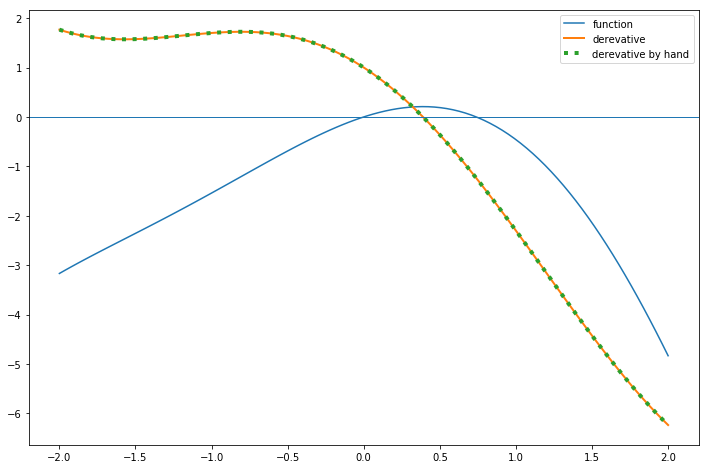

In [6]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.plot(X, sess.run(grad_y, {x: X})[0],lw=2, label="derevative")
plt.plot(X, sess.run(grad_by_hand, {x: X}), ":", lw=4, label="derevative by hand")
plt.axhline(y=0, linewidth=1)
plt.legend();

In [7]:
iterations = 10
xs1 = [-2]

for _ in range(iterations):
    current_x = xs1[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs1.append(next_x)
    
xs2 = [2]

for _ in range(iterations):
    current_x = xs2[-1]
    next_x = current_x - sess.run(y/grad_y[0], {x: current_x})
    xs2.append(next_x)

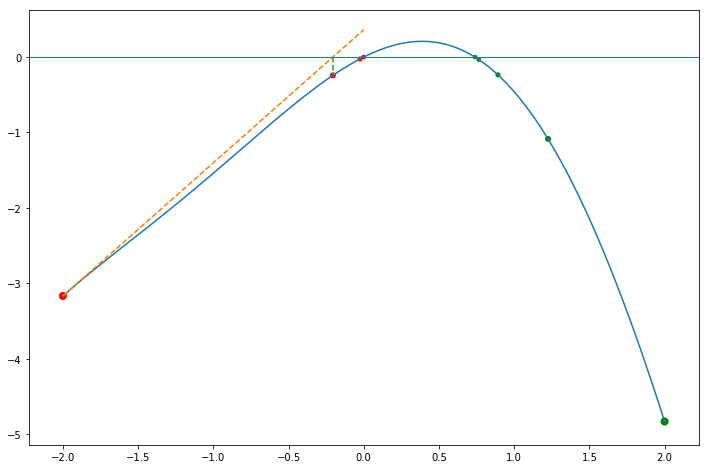

In [8]:
plt.figure(figsize=(12, 8))

plt.plot(X, sess.run(y, {x: X}), label="function")
plt.scatter(xs1, sess.run(y, {x: xs1}), s = 50/np.arange(1, 1+len(xs1)), c="red")

x0, y0, k = xs1[0], sess.run(y, {x: xs1[0]}), sess.run(grad_y[0], {x: xs1[0]})
plt.plot([x0, 0], [y0, y0 + k * (0 - x0)], "--")
plt.plot([xs1[1], xs1[1]], [0, sess.run(y, {x: xs1[1]})], "--")

plt.scatter(xs2, sess.run(y, {x: xs2}), s = 50/np.arange(1, 1+len(xs2)), c="green")

plt.axhline(y=0, linewidth=1)